In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Preparation

Divisi marketing ingin meningkatkan potensi pendapatan dari paket layanan di salah satu perusahaan telekomunikasi. Adapun rekomendasi yang diusulkan yaitu dengan memprediksi pelanggan yang berpotensi menghentikan layanan produk (CHURN). Dengan prediksi tersebut, manajemen memproyeksikan mampu melakukan langkah-langkah preventif dalam rangka meningkatkan loyalitas pelanggan berdasarkan data pelanggan, paket layanan dan data pendukung lainnya.

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file = pd.read_csv('/content/drive/MyDrive/UTS/UTS2/sampledatauts.csv', delimiter=',')
file

,WITEL,ID_CUSTOMER,SPEED,PRODUCT,TECHNO,IS_USAGE_VOICE,IS_USAGE_INET,ARPU,RANGE_UMUR,CLV,IS_CHURN,BYTES,LIST_ASSET,COMPLAINT,USAGE,MINIPACK,STB2,STB3,PLC,UPGRADE_SPEED,WIFI_EXT,INDIBOX,GAME
0,BN,101,20480,Paket A,FIBER,0,1,308000,c. 7-12 bln,2156000,0,5.050000e+11,3,0,>200 GB,0,0,0,0,0,0,0,0
1,JT,102,10240,Paket B,FIBER,0,1,375651,d. 1-2 thn,7513020,0,1.850000e+11,7,3,100GB-200GB,0,0,0,0,0,0,0,0
2,JS,103,30720,Paket B,FIBER,0,1,455400,d. 1-2 thn,5464800,0,8.670000e+11,6,5,>200 GB,2,0,0,0,0,0,0,0
3,BR,104,51200,Paket B,FIBER,0,1,830500,e. 3-4 thn,39033500,0,2.170000e+11,13,7,>200 GB,4,1,0,0,0,0,0,0
4,JT,105,10240,Paket A,FIBER,0,1,236500,a. 0-3 bln,473000,0,1.930000e+11,2,1,100GB-200GB,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93459,JS,93560,10240,Paket B,NON FIBER,0,1,440000,d. 1-2 thn,8360000,1,2.610000e+11,5,1,>200 GB,0,0,0,0,0,0,0,0
93460,JT,93561,10240,Paket B,FIBER,0,1,446600,d. 1-2 thn,7592200,1,7.420451e+10,6,1,20GB-100 GB,1,0,0,0,0,0,0,0
93461,BS,93562,10240,Paket B,FIBER,0,1,379500,e. 3-4 thn,12903000,1,6.371452e+06,4,0,< 20GB,0,0,0,0,0,0,0,0
93462,BS,93563,20480,Paket B,FIBER,0,1,591800,e. 3-4 thn,17162200,1,NaN,5,1,NO USAGE,1,0,0,0,0,0,0,0


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93464 entries, 0 to 93463
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WITEL           93464 non-null  object 
 1   ID_CUSTOMER     93464 non-null  int64  
 2   SPEED           93464 non-null  int64  
 3   PRODUCT         93464 non-null  object 
 4   TECHNO          93464 non-null  object 
 5   IS_USAGE_VOICE  93464 non-null  int64  
 6   IS_USAGE_INET   93464 non-null  int64  
 7   ARPU            93464 non-null  int64  
 8   RANGE_UMUR      93464 non-null  object 
 9   CLV             93464 non-null  int64  
 10  IS_CHURN        93464 non-null  int64  
 11  BYTES           82819 non-null  float64
 12  LIST_ASSET      93464 non-null  int64  
 13  COMPLAINT       93464 non-null  int64  
 14  USAGE           93464 non-null  object 
 15  MINIPACK        93464 non-null  int64  
 16  STB2            93464 non-null  int64  
 17  STB3            93464 non-null 

In [ ]:
file['IS_CHURN'].value_counts()

0    87752
1     5712
Name: IS_CHURN, dtype: int64

terdapat 5712 pelanggan yang akan berpindah (churn) ke provider yang lain

In [ ]:
file.isnull().sum()

WITEL                 0
ID_CUSTOMER           0
SPEED                 0
PRODUCT               0
TECHNO                0
IS_USAGE_VOICE        0
IS_USAGE_INET         0
ARPU                  0
RANGE_UMUR            0
CLV                   0
IS_CHURN              0
BYTES             10645
LIST_ASSET            0
COMPLAINT             0
USAGE                 0
MINIPACK              0
STB2                  0
STB3                  0
PLC                   0
UPGRADE_SPEED         0
WIFI_EXT              0
INDIBOX               0
GAME                  0
dtype: int64

Terdapat missing value sebanyak 10.645 pada variabel BYtes sehingga akan kita drop

In [ ]:
file.dropna(axis=0,inplace=True)

In [ ]:
file

,WITEL,ID_CUSTOMER,SPEED,PRODUCT,TECHNO,IS_USAGE_VOICE,IS_USAGE_INET,ARPU,RANGE_UMUR,CLV,IS_CHURN,BYTES,LIST_ASSET,COMPLAINT,USAGE,MINIPACK,STB2,STB3,PLC,UPGRADE_SPEED,WIFI_EXT,INDIBOX,GAME
0,BN,101,20480,Paket A,FIBER,0,1,308000,c. 7-12 bln,2156000,0,5.050000e+11,3,0,>200 GB,0,0,0,0,0,0,0,0
1,JT,102,10240,Paket B,FIBER,0,1,375651,d. 1-2 thn,7513020,0,1.850000e+11,7,3,100GB-200GB,0,0,0,0,0,0,0,0
2,JS,103,30720,Paket B,FIBER,0,1,455400,d. 1-2 thn,5464800,0,8.670000e+11,6,5,>200 GB,2,0,0,0,0,0,0,0
3,BR,104,51200,Paket B,FIBER,0,1,830500,e. 3-4 thn,39033500,0,2.170000e+11,13,7,>200 GB,4,1,0,0,0,0,0,0
4,JT,105,10240,Paket A,FIBER,0,1,236500,a. 0-3 bln,473000,0,1.930000e+11,2,1,100GB-200GB,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93457,TG,93558,10240,Paket A,FIBER,0,1,324500,e. 3-4 thn,7788000,1,1.810000e+11,5,3,100GB-200GB,0,0,0,0,0,0,0,0
93459,JS,93560,10240,Paket B,NON FIBER,0,1,440000,d. 1-2 thn,8360000,1,2.610000e+11,5,1,>200 GB,0,0,0,0,0,0,0,0
93460,JT,93561,10240,Paket B,FIBER,0,1,446600,d. 1-2 thn,7592200,1,7.420451e+10,6,1,20GB-100 GB,1,0,0,0,0,0,0,0
93461,BS,93562,10240,Paket B,FIBER,0,1,379500,e. 3-4 thn,12903000,1,6.371452e+06,4,0,< 20GB,0,0,0,0,0,0,0,0


In [ ]:
file.isnull().sum()

WITEL             0
ID_CUSTOMER       0
SPEED             0
PRODUCT           0
TECHNO            0
IS_USAGE_VOICE    0
IS_USAGE_INET     0
ARPU              0
RANGE_UMUR        0
CLV               0
IS_CHURN          0
BYTES             0
LIST_ASSET        0
COMPLAINT         0
USAGE             0
MINIPACK          0
STB2              0
STB3              0
PLC               0
UPGRADE_SPEED     0
WIFI_EXT          0
INDIBOX           0
GAME              0
dtype: int64

Karena efek dari drop missing value itu banyaknya row menjadi 82819 row

In [ ]:
file['ARPU'].value_counts()

308000    6243
352000    4387
363000    2203
396000    1934
379500    1853
          ... 
110294       1
343748       1
593602       1
464577       1
409240       1
Name: ARPU, Length: 16719, dtype: int64

In [ ]:
file['PRODUCT'].unique()

array(['Paket A', 'Paket B'], dtype=object)

#A. Analisis statistik deskriptif ARPU, CLV, BYTES dan IS_CHURN berdasarkan kelompok produk

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).mean()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,341834.071174,1.007413e+07,2.947149e+11,0.007468
Paket B,457323.315904,1.400026e+07,2.913495e+11,0.092098


Terlihat bahwa rata-rata 'ARPU' atau '(pendapatan rata-rata per pengguna)' pada paket B lebih besar 115,489 daripada paket A artinya pelanggan paket B memiliki pendapatan yang lebih tinggi dari pendapatan pelanggan paket A

Rata-rata Nilai umur pelanggan atau 'CLV' dari paket B juga lebih panjang dibandingkan dengan produk A artinya paket B lebih memberi nilai kepada pelanggannya daripada paket A

Tetapi penggunaan rata-rata per bytes pada paket B lebih kecil daripada paket A

sehingga rata-rata Pelanggan paket B lebih mudah pindah ke provider lain ( Churn ) daripada pelanggan paket A

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).median()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,308495,5280000,2.340000e+11,0
Paket B,412500,8602000,2.450000e+11,0


Nilai tengah pendapatan rata-rata per pengguna pada paket B lebih besar dibandingkan dengan paket A selisihnya sekitar 104005

Nilai tengah CLV pada paket A lebih kecil dibandingkan dengan paket B

meski produk A memiliki rata-rata bytes lebih besar dibandingkan paket B tetapi di Median ini paket memilki nilia lebih kecil dibandingkan paket B

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).sum()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,11214550373,330501854088,9.668712e+15,245
Paket B,22871653675,700180918482,1.457097e+16,4606


Hasil dari statistik diatas bahwa jumlah paket B Churn sebanyak 4.606 orang sedangkan pada paket A Churn sebanyak 245 orang

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).min()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,0,0,144.0,0
Paket B,0,0,708.0,0


penggunaan bytes paket A lebih kecil dibandingkan dengan paket B

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).max()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,3679753,205890048,2.530000e+13,1
Paket B,4452878,335851490,2.190000e+13,1


Nilai Maximal ARPU pada paket B lebih besar diabndingkan dengan paket A

Nilai maximal CLV paket B juga masih lebih panjang dibandingkan paket A

sedangkan nilai maximal bytes pada paket A lebih besar dari paket B

Tetapi tingkat max Churn pada paket A dan B sama 

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['PRODUCT']]).std()

,ARPU,CLV,BYTES,IS_CHURN
PRODUCT,,,,
Paket A,143431.302448,1.424041e+07,4.099911e+11,0.086095
Paket B,204098.306869,1.696442e+07,3.191340e+11,0.289167


tingkat heterogen elemen data ARPU dan CLV pada paket B lebih besar dibandingkan dengan paket A

sedangkan standar deviasi untuk Bytes paket A lebih besar dari B

sehingga Churn dari paket A lebih kecil dibandingkan paket B

#B. Analisis statistik deskriptif ARPU, CLV, BYTES dan IS_CHURN berdasarkan kelompok pelanggan

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).mean()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,396515.978923,1.049939e+07,3.608374e+11,0.070592
BR,399505.514219,1.235757e+07,2.978411e+11,0.028680
BS,396917.237876,1.100719e+07,2.911738e+11,0.062685
JB,447113.858113,1.490539e+07,2.875741e+11,0.060829
JS,433321.023914,1.374546e+07,2.811715e+11,0.062007
JT,408106.368618,1.285531e+07,2.814973e+11,0.071250
TG,408757.085852,1.149175e+07,2.890617e+11,0.052613


Rata-rata ( pendapatan rata-rata per pengguna )/ ARPU pelanggan pada witel JB lebih besar dibandingkan dengan witel yang lainnya diikuti oleh JS,TG, JT, BR,BS, dan BN

Rata-rata Nilai umur pelanggan atau CLV dari pelanggan witel JB juga lebih besar dibandingkan dengan pelanggan witel BN, BR, BS, JS, JT,TG

Sedangkan mean pengguaan bytes dari pelanggan witel BN paling besar dari pelanggan yg lain dan rata-rata penggunaan bytes pelanggan pada witel JS adalah yang paling sedikit 

Dan Tingkat Churn pada pelanggan witel JT paling memungkinkan. diikuti pelanggan witel BN, BS, JS, JB, TG dan pelanggan yang tidak memungkinkan Churn adalah witel BR

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).median()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,363000,6138000,2.650000e+11,0
BR,368500,6533670,2.510000e+11,0
BS,368500,6489450,2.340000e+11,0
JB,401500,8695863,2.320000e+11,0
JS,385000,7647960,2.360000e+11,0
JT,374000,7326000,2.410000e+11,0
TG,374000,6930000,2.360000e+11,0


Nilai tengah/Median ARPU dan CLV dari witel JB paling besar dibandingkan pelanggan pada witel yang lain 
 
Sedangkan median dari penggunaan bytes dari witel BN paling besar dibandingkan yang lainnya

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).sum()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,2370372522,62765376739,2.157086e+15,422
BR,4945079255,152962044354,3.686677e+15,355
BS,5090860493,141178216541,3.734595e+15,804
JB,3094475012,103160233775,1.990300e+15,421
JS,5653539399,179337073355,3.668445e+15,809
JT,8184981329,257826187208,5.645710e+15,1429
TG,4746896038,133453640598,3.356873e+15,611


Jumlah ARPU, CLV, Bytes dan Churn dari witel JT merupakan yang paling besar  dibandingkan dengan witel yang lainnya yaitu sebesar 8184981329, 257826187208, 5.645710e+15, 1429 orang

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).min()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,0,0,38680.0,0
BR,0,0,800.0,0
BS,0,0,88475.0,0
JB,0,0,2334.0,0
JS,0,0,708.0,0
JT,0,0,144.0,0
TG,0,0,11507.0,0


minimal Penggunaan bytes pada witel JT merupakan yang paling sedikit yaitu hanya 114 bytes

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).max()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,3471227,166069904,2.530000e+13,1
BR,3288633,216798057,1.030000e+13,1
BS,3291200,201261280,1.280000e+13,1
JB,2653453,293441624,1.330000e+13,1
JS,3956698,285707400,5.000000e+12,1
JT,3431215,335851490,8.670000e+12,1
TG,4452878,197320846,1.870000e+13,1


Maximal ARPU dari witel TG merupakan yang paling besar

sedangkan Maximal CLV dan bytes dari witel JT yang paling besar  

dan untuk maximal tingkat Churn pada semua witel terhitung sama

In [ ]:
file[['ARPU','CLV','BYTES','IS_CHURN']].groupby([file['WITEL']]).count()

,ARPU,CLV,BYTES,IS_CHURN
WITEL,,,,
BN,5978,5978,5978,5978
BR,12378,12378,12378,12378
BS,12826,12826,12826,12826
JB,6921,6921,6921,6921
JS,13047,13047,13047,13047
JT,20056,20056,20056,20056
TG,11613,11613,11613,11613


Terhitung row paling banyak memuat info tentang ARPU , CLV, BYtes dan Churn ada pada witek JT

#C. Apakah terdapat imbalance dalam data pelanggan yang berhenti berlangganan(IS_CHURN)? Jika YA, bagaimana cara menyelesaikannya? 

**Salah satunya dapat menggunakan Up-sample Minority Class**
artinya menaikan jumlah data dari kelas yang jumlahnya kecil

In [ ]:
from sklearn.utils import resample

In [ ]:
#Pisahkan antara majority class dan minority class
majority_class = file[file.IS_CHURN==0]
minority_class = file[file.IS_CHURN==1]
minority_class_upsample = resample(minority_class,
                                   replace=True, #sample dengan adanya pengubahan
                                   n_samples= 87752, #matchkan dengan majority class
                                   random_state=123 #default nilai random state pada upsample
                                   )
#gabungkan  majority class dengan minority_class_upsample
upsample = pd.concat([majority_class,minority_class_upsample])

In [ ]:
upsample.IS_CHURN.value_counts()

1    87752
0    77968
Name: IS_CHURN, dtype: int64

Terdapat 87752 orang yang akan Churn, Sehingga yang harus dilakukan manajemen agar tingkat Churn tidak bertambah adalah : 

Menganalisis mengapa churn terjadi

Berinteraksi dengan pelanggan

Tentukan pelanggan yang paling berharga

Tawarkan insentif

Targetkan audiens yang tepat

Berikan layanan yang lebih baik

Perhatikan keluhannya

Pamerkan keunggulan kompetitif perusahaan

#D. Dengan menggunakan 80% dataset sebagai data train dan sisanya 20% sebagai data test, bagaimana hasil prediksi dengan model Logistic Regression, Random Forest, Decision Tree, Naïve Bayes?

In [ ]:
#creating a new dataframe 
file1 = file.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#type are categorical columns:
WITEL1=LabelEncoder()
PRODUCT1=LabelEncoder()
TECHNO1=LabelEncoder()
RANGE_UMUR1=LabelEncoder()
USAGE1=LabelEncoder()
file1['WITEL']= WITEL1.fit_transform(file1['WITEL'])
file1['PRODUCT']= PRODUCT1.fit_transform(file1['PRODUCT'])
file1['TECHNO']= PRODUCT1.fit_transform(file1['TECHNO'])
file1['RANGE_UMUR']= RANGE_UMUR1.fit_transform(file1['RANGE_UMUR'])
file1['USAGE']= USAGE1.fit_transform(file1['USAGE'])

In [ ]:
y = file1['IS_CHURN']
X = file1.drop(['IS_CHURN'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training and 20% testing

##Model Logistic Regression

In [ ]:
LR = LogisticRegression() #using default values
#training our model
model_LR = LR.fit(X_train,y_train)
#predicting our labels
predict_LR = model_LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(classification_report(y_test,predict_LR))
accuracy_score(y_test,predict_LR)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15643
           1       0.00      0.00      0.00       921

    accuracy                           0.94     16564
   macro avg       0.47      0.50      0.49     16564
weighted avg       0.89      0.94      0.92     16564



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9443974885293407

Tingkat akurasi untuk Model Logistic Regression sebesar 0,94

##Model Random Forest

In [ ]:
RF = RandomForestClassifier() #using default values
#training our model
model_RF = RF.fit(X_train,y_train)
#predicting our labels
predict_RF = model_RF.predict(X_test)

In [ ]:
print(classification_report(y_test,predict_RF))
accuracy_score(y_test,predict_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15643
           1       1.00      1.00      1.00       921

    accuracy                           1.00     16564
   macro avg       1.00      1.00      1.00     16564
weighted avg       1.00      1.00      1.00     16564



1.0

Tingkat akurasi untuk Model Random Forest sebesar 1

##Model Decision Tree

In [ ]:
DT = DecisionTreeClassifier() #using default values
#training our model
model_DT = DT.fit(X_train,y_train)
#predicting our labels
predict_DT = model_DT.predict(X_test)

In [ ]:
print(classification_report(y_test,predict_DT))
accuracy_score(y_test,predict_DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15643
           1       1.00      1.00      1.00       921

    accuracy                           1.00     16564
   macro avg       1.00      1.00      1.00     16564
weighted avg       1.00      1.00      1.00     16564



0.9999396281091524

Tingkat akurasi untuk Model Decision Tree sebesar 0,99

##Model Naive Bayes

In [ ]:
NB = GaussianNB() #using default values
#training our model
model_NB = NB.fit(X_train,y_train)
#predicting our labels
predict_NB = model_NB.predict(X_test)

In [ ]:
print(classification_report(y_test,predict_NB))
accuracy_score(y_test,predict_NB)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15643
           1       0.00      0.00      0.00       921

    accuracy                           0.94     16564
   macro avg       0.47      0.50      0.49     16564
weighted avg       0.89      0.94      0.92     16564



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9443974885293407

Tingkat akurasi untuk Model Naive Bayes sebesar 0,94

##Summary Hasil Prediksi

In [ ]:
from prettytable import PrettyTable
accTable = PrettyTable(['Model', 'Accuracy'])
accTable.add_row(['Logistic Regression', '0.94'])
accTable.add_row(['Random Forest', '1'])
accTable.add_row(['Decision Tree', '0.99'])
accTable.add_row(['Naive Bayes', '0.94'])
print(accTable)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |   0.94   |
|    Random Forest    |    1     |
|    Decision Tree    |   0.99   |
|     Naive Bayes     |   0.94   |
+---------------------+----------+


Dilihat dari tingkat akurasi model Random Forest memiliki tingkat yang sempurna yaitu 1

---



---



#E. Berapa presisi model berdasarkan Test Confusion Matrix? Model mana yang Saudara rekomendasikan? Jelaskan!

##Model Logistic Regression

[[15643     0]
 [  921     0]]


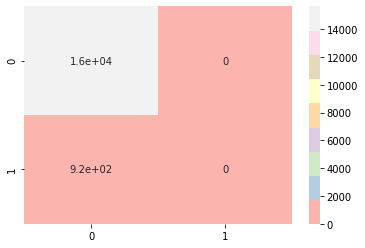

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_LR)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="Pastel1")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_LR, average='binary')
precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

True Positive (TP): kita memprediksi Churn sebesar 0 dan memang benar terjadi

True Negative (TN): kita memprediksi Churn tidak terjadi sebesar 15643 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Churn terjadi sebesar 0 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Churn tidak terjadi 0 kasus dan ternyata prediksi salah, Churn terjadi. 

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Diperoleh bahwa dengan menggunakan Logistic Regression memiliki tingkat precision sebesar 0

##Model Random Forest

[[15643     0]
 [    0   921]]


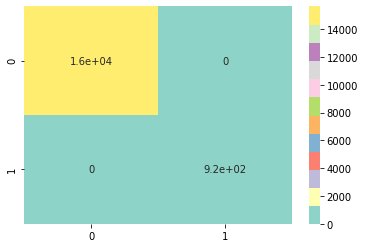

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_RF)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="Set3")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_RF, average='binary')
precision

1.0

True Positive (TP): kita memprediksi Churn sebesar 921 dan memang benar terjadi

True Negative (TN): kita memprediksi Churn tidak terjadi sebesar 15643 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Churn terjadi sebesar 0 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Churn tidak terjadi 0 kasus dan ternyata prediksi salah, ternyata kasus Churn terjadi.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Diperoleh bahwa dengan menggunakan Model Random Forest memiliki tingkat precision sebesar 1

##Model Decision Tree

[[15643     0]
 [    1   920]]


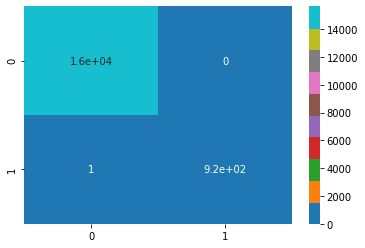

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_DT)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="tab10")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_DT, average='binary')
precision

1.0

True Positive (TP): kita memprediksi Churn sebesar 920 dan memang benar terjadi

True Negative (TN): kita memprediksi Churn tidak terjadi sebesar 15643 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Churn terjadi sebesar 1 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Churn tidak terjadi 0 kasus dan ternyata prediksi salah, ternyata kasus Churn terjadi.



Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Diperoleh bahwa dengan menggunakan Model Decision Tree memiliki tingkat precision sebesar 1

##Model Naive Bayes

[[15643     0]
 [  921     0]]


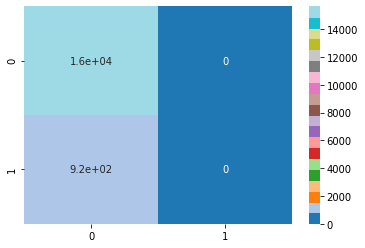

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_NB)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, cmap="tab20")

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predict_NB, average='binary')
precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

True Positive (TP): kita memprediksi Churn sebesar 0 dan memang benar terjadi

True Negative (TN): kita memprediksi Churn tidak terjadi sebesar 15643 dan memang benar tidak terjadi.

False Positive (FP):kita memprediksi Churn terjadi sebesar 921 dan ternyata prediksi salah, ternyata tidak terjadi

False Negative (FN) : kita memprediksi Churn tidak terjadi 0 kasus dan ternyata prediksi salah, ternyata kasus Churn terjadi.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Diperoleh bahwa dengan menggunakan Model Naive Bayes memiliki tingkat precision sebesar 0

##Summary Hasil Precision

In [ ]:
accTable = PrettyTable(['Model', 'Precision'])
accTable.add_row(['Logistic Regression', '0'])
accTable.add_row(['Random Forest', '1'])
accTable.add_row(['Decision Tree', '1'])
accTable.add_row(['Naive Bayes', '0'])
print(accTable)

+---------------------+-----------+
|        Model        | Precision |
+---------------------+-----------+
| Logistic Regression |     0     |
|    Random Forest    |     1     |
|    Decision Tree    |     1     |
|     Naive Bayes     |     0     |
+---------------------+-----------+


Model prediksi yang paling mendekati/direkomdasikan menggunakan Model Random Forest dengan tingkat akurasi 1 dan tingkat precision 1

Random forest menyajikan perkiraan untuk kepentingan variabel, yaitu neural nets. Menawarkan metode superior untuk bekerja dengan data yang hilang/Missing Value. Nilai yang hilang diganti dengan variabel yang paling banyak muncul di node tertentu. Di antara semua metode klasifikasi yang tersedia, Random Forest memberikan akurasi tertinggi.

Teknik Random Forest juga dapat menangani data besar dengan banyak variabel yang mencapai ribuan. Ini dapat secara otomatis menyeimbangkan kumpulan data ketika kelas lebih jarang daripada kelas lain dalam data. Metode ini juga menangani variabel dengan cepat, sehingga cocok untuk tugas yang rumit.

#F. Hitung berapa besar Area-Under-Curve (AUC) dan Receiver-Operator Characteristics (ROC) untuk model tersebut?

In [ ]:
y = file1['IS_CHURN']
X = file1.drop(['IS_CHURN'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training and 20% testing

In [ ]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = DecisionTreeClassifier()
clf4 = GaussianNB()

In [ ]:
probas1_ = clf1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = clf2.fit(X_train, y_train).predict_proba(X_test)
probas3_ = clf3.fit(X_train, y_train).predict_proba(X_test)
probas4_ = clf4.fit(X_train, y_train).predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import roc_curve, auc
fp1, tp1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc_model2 = auc(fp2, tp2)
fp3, tp3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc_model3 = auc(fp3, tp3)
fp4, tp4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc_model4 = auc(fp4, tp4)

In [ ]:
print("AUC for Logistic Regression Model : ",roc_auc_model1)
print("AUC for Random Forest Model :" ,roc_auc_model2)
print("AUC for Decision Tree Model : ",roc_auc_model3)
print("AUC for Naive Bayes Model :" ,roc_auc_model4)

AUC for Logistic Regression Model :  0.5
AUC for Random Forest Model : 1.0
AUC for Decision Tree Model :  0.999457111834962
AUC for Naive Bayes Model : 0.7520813026650627


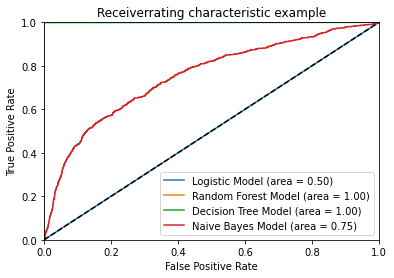

In [ ]:
plt.clf()
plt.plot(fp1, tp1, label='Logistic Model (area = %0.2f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='Random Forest Model (area = %0.2f)' % roc_auc_model2)
plt.plot(fp3, tp3, label='Decision Tree Model (area = %0.2f)' % roc_auc_model3)
plt.plot(fp4, tp4, label='Naive Bayes Model (area = %0.2f)' % roc_auc_model4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right")
plt.show()

Berikut visualisasi ROC-AUC dari model-model yang telah dihitung dan diprediksi 

Model Random Forest dan Decision Tree memiliki nilai ROC-AUC yang sempurna  yaitu 1

Sedangkan Model Logistic Regression dan Naive Bayes memiliki nilai ROC-AUC yaitu 0

Terlihat bahwa Model Random Forest dan Decision Tree yang paling bagus karena semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus